# Data Python IPSSI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from classes.Question import Question
from classes.Chart import Chart
# Gestion Warning Jupiter Anaconda
pd.options.mode.chained_assignment = None

## Importation du `DataSet`

In [2]:
dataframe_global = pd.read_csv("articles_data.csv")

## Est-ce que la mise en avant d'un article sur le site produit plus d'engagement ?

**Fonction pour avoir le resultat (sans graphique)** :

In [3]:
# Est-ce que la mise en avant d'un article sur le site produit plus d'engagement ?
def resultHighlightinArticleGenerateMoreEngagement(data, instanceObject):

    # Récupération des top articles
    top_article = data[data.top_article == 1]

    # Calcule du pourcentage de top articles par rapport au total d'article
    pourcent_top_article = len(top_article) / len(data) * 100

    # Sum total des articles sur reaction / share / comment
    sum_article_reaction = data.engagement_reaction_count.sum()
    sum_article_share = data.engagement_share_count.sum()
    sum_article_comment = data.engagement_comment_count.sum()

    # Sum des top articles sur reaction / share / comment
    sum_top_article_reaction = top_article.engagement_reaction_count.sum()
    sum_top_article_share = top_article.engagement_share_count.sum()
    sum_top_article_comment = top_article.engagement_comment_count.sum()

    # Pourcentage des sum
    instanceObject.temp_variable['pourcent_top_reaction'] = sum_top_article_reaction / sum_article_reaction * 100
    instanceObject.temp_variable['pourcent_top_share'] = sum_top_article_share / sum_article_share * 100
    instanceObject.temp_variable['pourcent_top_comment'] = sum_top_article_comment / sum_article_comment * 100

    print("Pourcentage des articles en top : " + str(round(pourcent_top_article, 2)) + "%")

    print("\n")

    print("Pourcentage des reactions des top articles : " + str(round(instanceObject.temp_variable['pourcent_top_reaction'], 2)) + "%")
    print("Pourcentage des partages des top articles : " + str(round(instanceObject.temp_variable['pourcent_top_share'], 2)) + "%")
    print("Pourcentage des commentaires des top articles : " + str(round(instanceObject.temp_variable['pourcent_top_comment'], 2)) + "%")
    
    print("\n")

**Fonction pour avoir le resultat (Graphique)** :

In [4]:
def graphicHighlightinArticleGenerateMoreEngagement(data, instanceObject) :
    # REACTIONS
    pourcent_top_reaction = instanceObject.temp_variable['pourcent_top_reaction']
    pourcent_top_share = instanceObject.temp_variable['pourcent_top_share']
    pourcent_top_comment = instanceObject.temp_variable['pourcent_top_comment']

    title_reaction = "Pourcentage des reactions en top article"
    datas_reaction = [100-pourcent_top_reaction, pourcent_top_reaction]
    labels_reaction = ['Articles classiques', 'Articles en top']
    explode = (0, 0.1)

    Chart.createPieChart(title_reaction, datas_reaction, labels_reaction, explode)

    # SHARE
    title_share = "Pourcentage des partages en top article"
    datas_share = [100-pourcent_top_share, pourcent_top_share]
    labels_share = ['Articles classiques', 'Articles en top']
    explode = (0, 0.1)

    Chart.createPieChart(title_share, datas_share, labels_share, explode)

    # COMMENT
    title_comment = "Pourcentage des commentaires en top article"
    datas_comment = [100-pourcent_top_comment, pourcent_top_comment]
    labels_comment = ['Articles classiques', 'Articles en top']
    explode = (0, 0.1)

    Chart.createPieChart(title_comment, datas_comment, labels_comment, explode)

** Réponse ** : * (Est-ce que la mise en avant d'un article sur le site produit plus d'engagement ?) *

Pourcentage des articles en top : 12.21%


Pourcentage des reactions des top articles : 23.99%
Pourcentage des partages des top articles : 35.58%
Pourcentage des commentaires des top articles : 28.15%


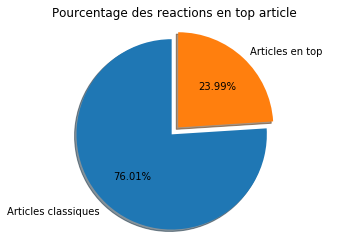

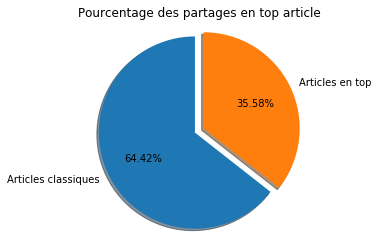

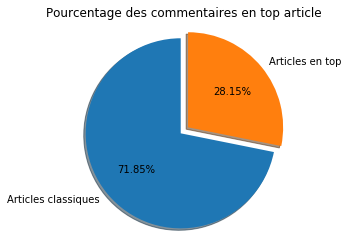

In [5]:
highlightinArticleGenerateMoreEngagement = Question('Est-ce que la mise en avant d\'un article sur le site produit plus d\'engagement ?', \
    dataframe_global, \
    resultHighlightinArticleGenerateMoreEngagement, \
    graphicHighlightinArticleGenerateMoreEngagement \
)

highlightinArticleGenerateMoreEngagement.showResult()
highlightinArticleGenerateMoreEngagement.showGraphic()

In [6]:
# Quel pourcentage d'articles likés est également partagés
def resultPercentageLikedItems(data, instanceObject):
    data.fillna(0)
    # df = df.drop(750)
    data.published_at = pd.to_datetime(data.published_at)
    # nombre d'article total
    instanceObject.temp_variable['nbArticle'] = len(data)
    # nombre d'article liké
    instanceObject.temp_variable['nbArticleLike'] = len(data.query('engagement_reaction_count > 0'))
    # nombre d'article liké et partagé
    nbArticleLikeAndShare = len(data.query('engagement_reaction_count > 0 \
                                          and engagement_share_count > 0'))
    # nombre d'article liké et commenté
    nbArticleLikeAndComment = len(data.query('engagement_reaction_count > 0 \
                                            and engagement_comment_count > 0'))
    # nombre d'article liké, partagé et commenté
    nbArticleLikeAndShareAndComment = len(data.query('engagement_reaction_count > 0 \
                                                    and engagement_share_count > 0 \
                                                    and engagement_comment_count > 0'))
    

In [7]:
def graphicPercentageLikedItems(data, instanceObject):
    nbArticle = instanceObject.temp_variable['nbArticle']
    nbArticleLike = instanceObject.temp_variable['nbArticleLike']
    
    pctLike = pd.Series([nbArticleLike / nbArticle * 100], index = ['Like'])

    title_article_likes = 'Pourcentage des articles likés'
    datas_article_likes = [nbArticleLike / nbArticle * 100, 100 - (nbArticleLike / nbArticle * 100)]
    labels_article_likes = ['Articles likés', 'Articles non likés']
    explode_article_likes = [0.1,0]

    Chart.createPieChart(title_article_likes, datas_article_likes, labels_article_likes, explode_article_likes)

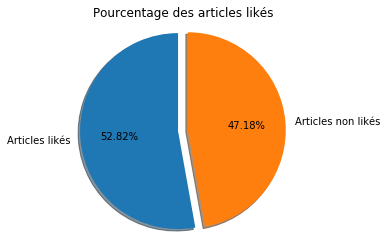

In [8]:
percentageLikedItems = Question('Quel est le pourcentage d\'articles likés ?', \
    dataframe_global, \
    resultPercentageLikedItems, \
    graphicPercentageLikedItems \
)

percentageLikedItems.showResult()
percentageLikedItems.showGraphic()

In [9]:
def resultPercentageLikedItemsEquallyShared(data, instanceObject):
    # nombre d'article liké et partagé
    instanceObject.temp_variable['nbArticleLikeAndShare'] = len(data.query('engagement_reaction_count > 0 \
                                          and engagement_share_count > 0'))
    # nombre d'article liké et commenté
    instanceObject.temp_variable['nbArticleLikeAndComment'] = len(data.query('engagement_reaction_count > 0 \
                                            and engagement_comment_count > 0'))
    # nombre d'article liké, partagé et commenté
    instanceObject.temp_variable['nbArticleLikeAndShareAndComment'] = len(data.query('engagement_reaction_count > 0 \
                                                    and engagement_share_count > 0 \
                                                    and engagement_comment_count > 0'))

In [10]:
def graphicPercentageLikedItemsEquallyShared(data, instanceObject):
    nbArticle = instanceObject.temp_variable['nbArticle']
    nbArticleLike = instanceObject.temp_variable['nbArticleLike']
    nbArticleLikeAndShare = instanceObject.temp_variable['nbArticleLikeAndShare']
    nbArticleLikeAndComment = instanceObject.temp_variable['nbArticleLikeAndComment']
    nbArticleLikeAndShareAndComment = instanceObject.temp_variable['nbArticleLikeAndShareAndComment']
    
    title = 'Pourcentage des articles selon les engagements'

    datas = [
            nbArticleLikeAndShare / nbArticleLike * 100,
            nbArticleLikeAndComment / nbArticleLike * 100,
            nbArticleLikeAndShareAndComment / nbArticleLikeAndShare * 100
    ]

    labels = [
                'Like & Share',
                'Like & Comment',
                'Like & Share & Comment'
    ]

    colors = ['#fe4a49','#2ab7ca','#fed766']

    Chart.createBarHChart(title, datas, labels, colors)

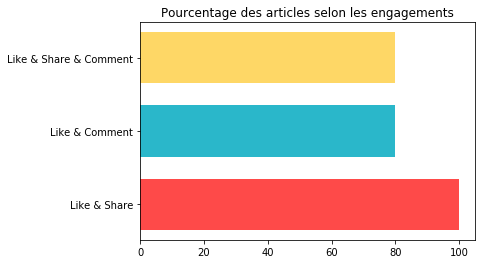

In [11]:
percentageLikedItemsEquallyShared = Question('Quel est le pourcentage d\'articles likés ?', \
    dataframe_global, \
    resultPercentageLikedItemsEquallyShared, \
    graphicPercentageLikedItemsEquallyShared \
)

percentageLikedItemsEquallyShared.showResult()
percentageLikedItemsEquallyShared.showGraphic()

In [12]:
# Quel est le pourcentage d'article signé par un/des auteur(s)?
def resultPercentageArticlesSignedByAuthor(data, instanceObject):
    dfWithoutNaNAuthor = data[data['author'].notnull()]

    dfWithoutNaNAuthor = dfWithoutNaNAuthor[dfWithoutNaNAuthor.apply(lambda x: x.source_name not in x.author, axis=1)]
    dfWithoutNaNAuthor = dfWithoutNaNAuthor[dfWithoutNaNAuthor.apply(lambda x: x.author not in x.source_name, axis=1)]

    keywordBanned = ('The', 'http', 'BBC', 'ABC', 'CBS', 'WSJ Staff')

    dfWithoutNaNAuthor = dfWithoutNaNAuthor[~dfWithoutNaNAuthor.author.str.startswith(keywordBanned)]

    count = dfWithoutNaNAuthor['author'].str.split().str.len()
    dfWithAuthor = dfWithoutNaNAuthor[~(count==1)]

    dfWithoutAuthorSign = data[~data.index.isin(dfWithAuthor.index)]

    nbTotalArticle = len(data)
    nbTotalArticleSigne = len(dfWithAuthor)
    nbTotalArticleNonSigne = len(dfWithoutAuthorSign)

    instanceObject.temp_variable['pctArticleSigne'] = round(nbTotalArticleSigne / nbTotalArticle * 100,2)
    instanceObject.temp_variable['pctArticleNonSigne'] = round(nbTotalArticleNonSigne / nbTotalArticle * 100,2)

    dfWithAuthor['nb_engagement'] = dfWithAuthor['engagement_reaction_count'] \
                                    + dfWithAuthor['engagement_comment_count'] \
                                    + dfWithAuthor['engagement_share_count'] \
                                    + dfWithAuthor['engagement_comment_plugin_count']

    dfWithoutAuthorSign['nb_engagement'] = dfWithoutAuthorSign['engagement_reaction_count'] \
                                        + dfWithoutAuthorSign['engagement_comment_count'] \
                                        + dfWithoutAuthorSign['engagement_share_count'] \
                                        + dfWithoutAuthorSign['engagement_comment_plugin_count']

    instanceObject.temp_variable['nbEngagementSigne'] = dfWithAuthor.nb_engagement.sum()
    instanceObject.temp_variable['nbEngagementNonSigne'] = dfWithoutAuthorSign.nb_engagement.sum()

    instanceObject.temp_variable['nbTotalEngagementArticle'] = data['engagement_reaction_count'].sum() \
                            + data['engagement_comment_count'].sum() \
                            + data['engagement_share_count'].sum() \
                            + data['engagement_comment_plugin_count'].sum()


In [13]:
def graphicPercentageArticlesSignedByAuthor(data, instanceObject):
    pctArticleSigne = instanceObject.temp_variable['pctArticleSigne']
    pctArticleNonSigne = instanceObject.temp_variable['pctArticleNonSigne']
    nbEngagementSigne = instanceObject.temp_variable['nbEngagementSigne']
    nbEngagementNonSigne = instanceObject.temp_variable['nbEngagementNonSigne']
    nbTotalEngagementArticle = instanceObject.temp_variable['nbTotalEngagementArticle']
    
    title = 'Pourcentage des articles signés'
    datas_articles = [pctArticleSigne, pctArticleNonSigne]
    datas_labels = ['Articles signés', 'Articles non signés']
    explode = [0.1,0]

    Chart.createPieChart(title, datas_articles, datas_labels, explode)

    pctEngagementArticleSigne = round(nbEngagementSigne / nbTotalEngagementArticle * 100,2)
    pctEngagementArticleNonSigne = round(nbEngagementNonSigne / nbTotalEngagementArticle * 100,2)

    title = 'Pourcentage des actions'
    datas_reaction = [pctEngagementArticleSigne, pctEngagementArticleNonSigne]
    Chart.createPieChart(title, datas_reaction, datas_labels, explode)


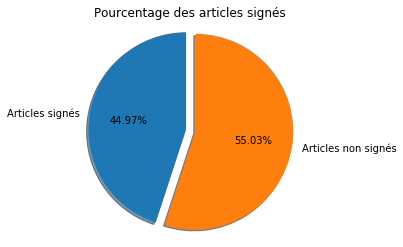

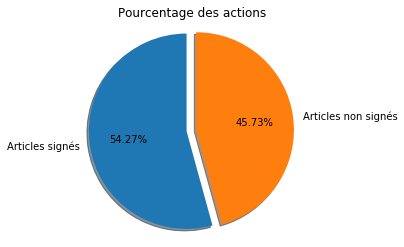

In [14]:
percentageArticlesSignedByAuthor = Question('Quel est le pourcentage d\'article signé par un/des auteur(s)?', \
    dataframe_global, \
    resultPercentageArticlesSignedByAuthor, \
    graphicPercentageArticlesSignedByAuthor \
)

percentageArticlesSignedByAuthor.showResult()
percentageArticlesSignedByAuthor.showGraphic()